**Aplicación de la técnica para desequilibrio de datos ADASYN**

In [ ]:
# 1. Libraries Implemented

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns



# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## 2.2 Data Loading

In [ ]:
credit = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv")

In [ ]:
credit.head()   

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit.drop('Unnamed: 0', axis=1, inplace=True) # Eliminando columna Unnamed del dataframe

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit["Default"] = credit["Risk"] # Creando la variable Default  (asignación de Risk a Default)
credit.info() # Validando que la variable Default se creo
# Para usar en otro proyecto
# print(data.rename(columns={'Index': 'newname'})) renombrar columnas con pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Default           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [ ]:
credit = credit.drop(columns="Risk")

In [ ]:
#credit.drop([ 'Risk'], axis=1) # Eliminando la varible Risk
credit.info # Validando que la variable Risk  se elimino

<bound method DataFrame.info of      Age     Sex  Job  ... Duration              Purpose Default
0     67    male    2  ...        6             radio/TV    good
1     22  female    2  ...       48             radio/TV     bad
2     49    male    1  ...       12            education    good
3     45    male    2  ...       42  furniture/equipment    good
4     53    male    2  ...       24                  car     bad
..   ...     ...  ...  ...      ...                  ...     ...
995   31  female    1  ...       12  furniture/equipment    good
996   40    male    3  ...       30                  car    good
997   38    male    2  ...       12             radio/TV    good
998   23    male    2  ...       45             radio/TV     bad
999   27    male    2  ...       45                  car    good

[1000 rows x 10 columns]>

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit['Default'].value_counts()

good    700
bad     300
Name: Default, dtype: int64

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Default           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Removiendo NaN missing

In [ ]:
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Default               0
dtype: int64

In [ ]:
# Removing NaN's de las caracteristicas  'Saving accounts' y 'Checking account' 

In [ ]:
credit['Saving accounts'] = credit['Saving accounts'].fillna(value = 'NA') # Rellena con NA

In [ ]:
print(credit['Saving accounts'].value_counts())  # frecuencia de las categorias de Saving accounts

#Construye la distribución de frecuencias de la variable Saving accounts, con los NA

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [ ]:
credit['Checking account'] = credit['Checking account'].fillna(value = 'NA')

In [ ]:
credit['Checking account'].value_counts() #

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
credit.isnull().sum()  # Comprobando que elimino los NA

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Default             0
dtype: int64

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NA,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Análsis Exploratorio de Datos 

In [ ]:
#Plot de  Sexo  según Default

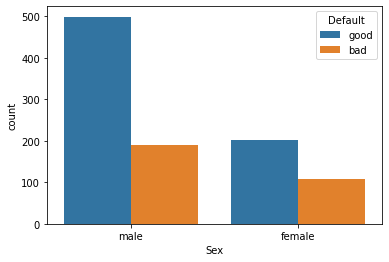

In [ ]:
sns.countplot(x= 'Sex', data = credit, hue= 'Default') # A python le importan las mayusculas

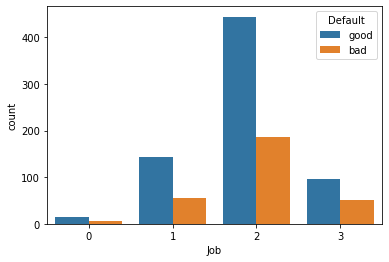

In [ ]:
sns.countplot(x= 'Job', data = credit, hue= 'Default')

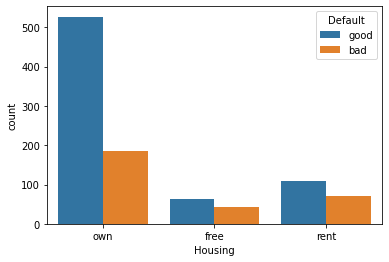

In [ ]:
sns.countplot(x= 'Housing', data = credit, hue= 'Default')

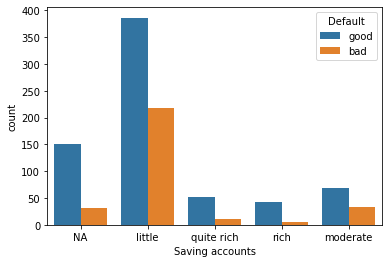

In [ ]:
sns.countplot(x= 'Saving accounts', data = credit, hue= 'Default')

**Proporción de cuentas de ahorro con ingresos little o moderate y su nivel de Default**

In [ ]:
print("\nLittle Income :\n",credit[credit['Saving accounts'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income\n", credit[credit['Saving accounts'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
       Default
good      386
bad       217

Moderate Income
       Default
good       69
bad        34


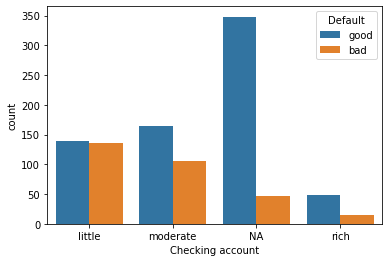

In [ ]:
sns.countplot(x= 'Checking account', data = credit, hue= 'Default')

#### Proporción de cuentas corriente con ingresos little o moderate y su nivel de Default

In [ ]:
print("\nLittle Income :\n",credit[credit['Checking account'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income :\n",credit[credit['Checking account'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
       Default
good      139
bad       135

Moderate Income :
       Default
good      164
bad       105


**Ingeniería de datos**

Según la inferencia de 'Cuenta de ahorros' y 'Cuenta corriente', podemos agrupar las columnas en 3 categorías:

'Little'

'Moderate'

'Other'

In [ ]:
# 'Saving Account'
credit['Saving accounts']=credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [ ]:
# 'Checking Account'
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [ ]:
## LabeEncoding the Purpose column
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])

In [ ]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


In [ ]:
credit.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,other,little,1169,6,5,good
1,22,female,2,own,little,moderate,5951,48,5,bad
2,49,male,1,own,little,other,2096,12,3,good
3,45,male,2,free,little,little,7882,42,4,good
4,53,male,2,free,little,little,4870,24,1,bad


# Procesamiento de datos

### Asignación de caraterísticas  'Dependent' and 'Independent' 

In [ ]:
##credit['default'] = credit['default'].map({'no':0, 'yes': 1})

credit['Default'] = credit['Default'].map({'good':0, 'bad': 1})

In [ ]:
print(credit['Default'].value_counts()) ## Distribución de frecuencia del target Default

0    700
1    300
Name: Default, dtype: int64


In [ ]:
#separating the y-column from the rest of the data

X=credit.drop("Default", axis=1)

y=credit["Default"]


In [ ]:
x1 = X.copy()

In [ ]:
x1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,other,little,1169,6,5
1,22,female,2,own,little,moderate,5951,48,5
2,49,male,1,own,little,other,2096,12,3
3,45,male,2,free,little,little,7882,42,4
4,53,male,2,free,little,little,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,other,1736,12,4
996,40,male,3,own,little,little,3857,30,1
997,38,male,2,own,little,other,804,12,5
998,23,male,2,free,little,little,1845,45,5


Estandarización de los datos: Dummification de las caracteristicas categóricas y Estandarizacion de las caracteristicas numéricas.

In [ ]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)


Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']


In [ ]:
# List to store Numerical Columns

num_cols = list(x1.columns[x1.dtypes!= 'object'])
print("\nNumerical Columns:" ,num_cols)



Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


###### *Etiquetado de caracteristicas categoricas:
    
###### La mayor parte de los agoritmos de ML, trabajan con caracteristicas numericas.    

In [ ]:
## One-Hot Encoding Categorical Columns
## drop_first=True evita la multicolibnealidad entre las caracteristicas

x1_dummy=pd.get_dummies(x1[cat_cols], drop_first=True)


In [ ]:
x1_dummy 

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other
0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1
996,1,1,0,0,0,0,0
997,1,1,0,0,0,0,1
998,1,0,0,0,0,0,0


In [ ]:
## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')
#x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

In [ ]:
x_new

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other,Age,Job,Credit amount,Duration,Purpose
0,1,1,0,0,1,0,0,67,2,1169,6,5
1,0,1,0,0,0,1,0,22,2,5951,48,5
2,1,1,0,0,0,0,1,49,1,2096,12,3
3,1,0,0,0,0,0,0,45,2,7882,42,4
4,1,0,0,0,0,0,0,53,2,4870,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,31,1,1736,12,4
996,1,1,0,0,0,0,0,40,3,3857,30,1
997,1,1,0,0,0,0,1,38,2,804,12,5
998,1,0,0,0,0,0,0,23,2,1845,45,5


###### Estandarización: 
    
StandardScaler estandariza una característica restando la media y 
luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
todos los valores por la desviación estándar. 

In [ ]:

## Estandarización: StandardScaler estandariza una característica restando la media y 
## luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
## todos los valores por la desviación estándar. 

#### Normalizing the Dataset
ss = StandardScaler()
x_normal = ss.fit_transform(x_new)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline


Dividiendo los datos en train y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normal, y, test_size = 0.2, random_state = 2020,stratify=y)

random_state :

Se usa básicamente para reproducir su problema de la misma manera cada vez que se ejecuta. Si no usa un estado_aleatorio en train_test_split, cada vez que realice la división, es posible que obtenga un conjunto diferente de puntos de datos de Test y train y no lo ayudará a depurar en caso de que tenga un problema.

Es solo para asegurarse de obtener la misma división cada vez que ejecuta su script. Leyendo sobre generadores de números pseudoaleatorios, (un número como 32525352 tendría el mismo efecto que 0 o 1; es solo una constante que se asigna a algún estado interno) Si no lo hace, se inicializa en función del tiempo, lo que da como resultado, resultados diferentes en la mayoría de sus ejecuciones

In [ ]:
#### En el siguiente paso se busca mantener las poporcions de desequilibrio tanto en test como en prueba

In [ ]:
# Results from split
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=560, 1=240, Test: 0=140, 1=60


###### ADASYN 


In [ ]:
#!pip install imbalanced-learn
#!pip install -U imbalanced-learn

In [ ]:

from collections import Counter
#from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN

# ADASYN
sampler = ADASYN(sampling_strategy=1)
X_sample,y_sample = sampler.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_sample))


Counter({0: 560, 1: 240})
Counter({0: 560, 1: 546})


**Función para calcular recall**

Calcula el recall tanto en datos de entrenamiento como en datos de prueba.

In [ ]:
def build_model_train_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    print("\n----------Accuracy Scores on Train data------------------------------------")
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))


    print("\n----------Accuracy Scores on Test data------------------------------------")
    y_pred_test = model.predict(x_test)
    
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    ax1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Train Data")

    ax2 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cbar=False,cmap='Greens',annot=True)
    plt.title("Normalized Confusion Matrix - Test Data")

#sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

In [ ]:
## Training the Logistic Regression model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.6957311534968211
Precision Score:  0.69009009009009
Recall Score:  0.7014652014652014

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.6164383561643836
Precision Score:  0.5232558139534884
Recall Score:  0.75


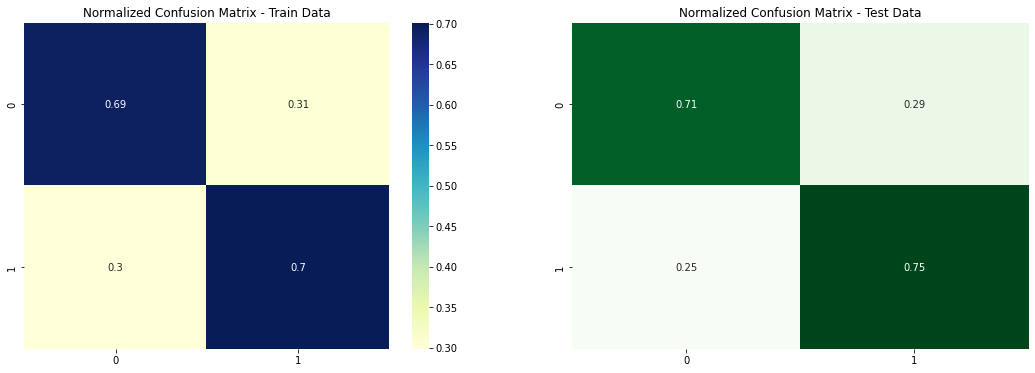

In [ ]:

from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(random_state = 2020)

build_model_train_test(lm, X_sample, X_test,y_sample,y_test)



Se observa que el recall, para el Logistic Regression tanto en datos de train, como en datos de test, es de: 0.70 y 0.75 respectivamente.Por lo que tenemos un buen rendimiento

In [ ]:
## Training the SVM model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.6865671641791045
Precision Score:  0.6272727272727273
Recall Score:  0.7582417582417582

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5988023952095808
Precision Score:  0.4672897196261682
Recall Score:  0.8333333333333334


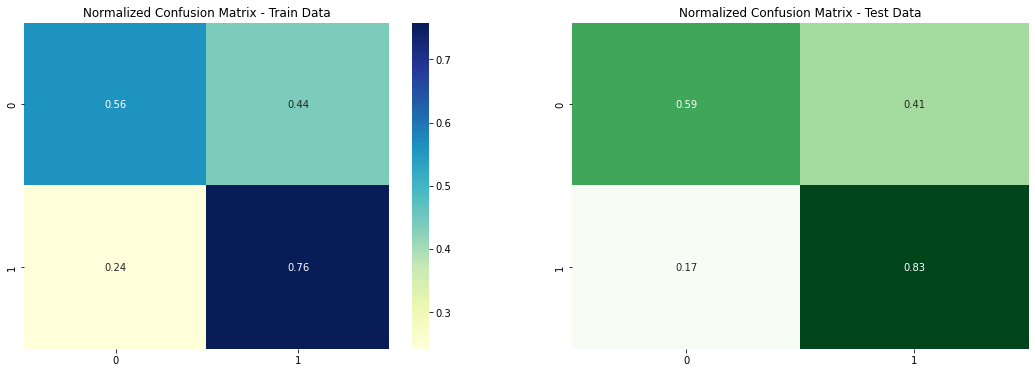

In [ ]:
from sklearn.svm import SVC
#svm = SVC(kernel ='linear', random_state = 0)
svm = SVC(kernel = 'linear', random_state = 0)
#lm.fit(X_sample, y_sample)
build_model_train_test(svm, X_sample, X_test,y_sample,y_test)


Se observa que el recall, para el Support Vector Machine tanto en datos de train, como en datos de test, es de: 0.76 y 0.83 respectivamente.Por lo que tenemos un buen rendimiento

In [ ]:
## Training the Random Forest model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.9917203311867525
Precision Score:  0.9963031423290203
Recall Score:  0.9871794871794872

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.509090909090909
Precision Score:  0.56
Recall Score:  0.4666666666666667


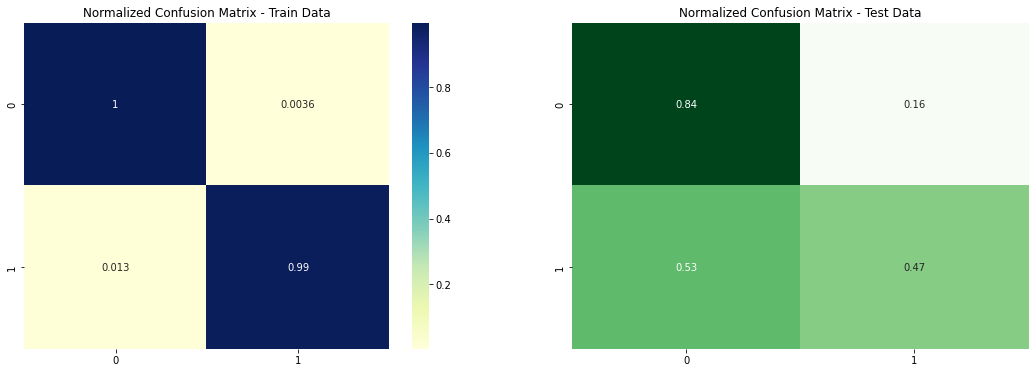

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2020)

build_model_train_test(rf, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para el Random Forest tanto en datos de train, como en datos de test, es de: 0.99 y 0.47 respectivamente.

In [ ]:
## Training the GradientBoostingClassifier model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.8704379562043797
Precision Score:  0.8672727272727273
Recall Score:  0.8736263736263736

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5737704918032787
Precision Score:  0.5645161290322581
Recall Score:  0.5833333333333334


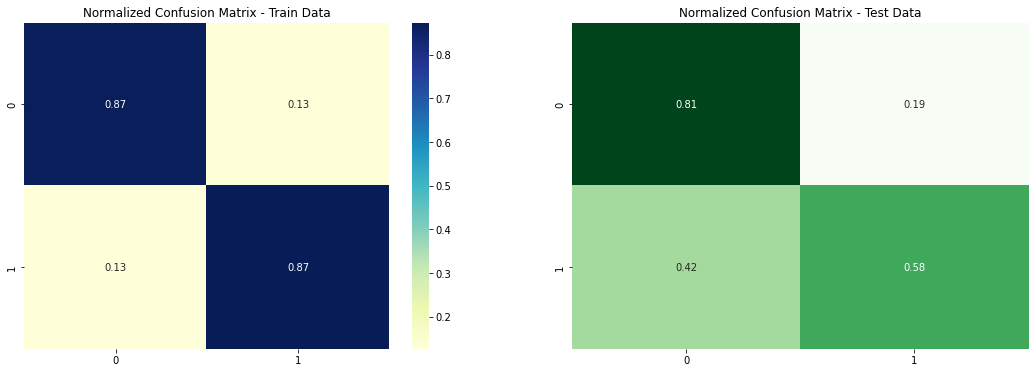

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=1)

build_model_train_test(gbc, X_sample, X_test,y_sample,y_test)



Se observa que el recall, para el **Gradient Boosting** tanto en datos de train, como en datos de test, es de: 0.87 y 0.58 respectivamente.

In [ ]:
#  Clasificador XGBoost


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.7779783393501806
Precision Score:  0.7669039145907474
Recall Score:  0.7893772893772893

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.6074074074074074
Precision Score:  0.5466666666666666
Recall Score:  0.6833333333333333


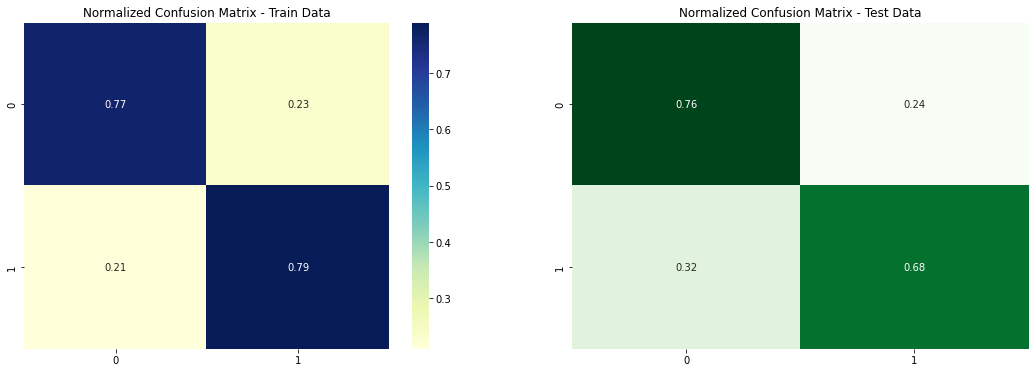

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object

abc = AdaBoostClassifier(random_state=42)

# Train Adaboost Classifer
build_model_train_test(abc, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para AdaBoost tanto en datos de train, como en datos de test, es de: 0.79 y 0.68 respectivamente.

**Cuáles son los 2 mejores modelos?**

De los resultados de Recall, se observa que los mejores rendimientos se obtuvieron con el modelo de Support Vector Machine y Regresión Logística, con recall de 0.83 y 0.75 respectivamente.